# Sympy

In [41]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Lets import everything from sympy. We will also enable pretty printing.

In [42]:
from sympy import *
init_printing()

We must define symbols which will be treated symbolically

In [43]:
x = symbols('x')

Let us define a function and differentiate it

In [44]:
f = x*sin(pi*x) + tan(pi*x)
diff(f,x)

Compute second derivative

In [45]:
diff(f,x,2)

Define a more complicated function and differentiate it

In [46]:
g = exp(x)
h = f*g
diff(h,x)

We can also compute integrals

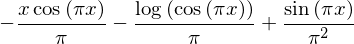

In [47]:
integrate(f,x)

## Solving equations

Let us find roots of quadratic equation

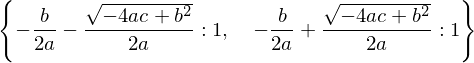

In [48]:
x, a, b, c = symbols('x a b c')
eq = a*x**2 + b*x + c
roots(eq,x)

Solve a linear system
$$
x_1 + x_2 = a, \qquad x_1 - x_2 = b
$$

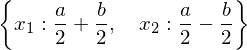

In [49]:
x1, x2, a, b = symbols('x1 x2 a b')
e1 = x1 + x2 - a
e2 = x1 - x2 - b
solve([e1, e2],[x1,x2])

## Example

Lets first define a function and get its derivative.

In [50]:
x = symbols('x')
f = x*sin(50*x)*exp(x)
g = diff(f,x)

How to visualize these functions ? We first create Python functions out of the symbolic expressions and then plot them.

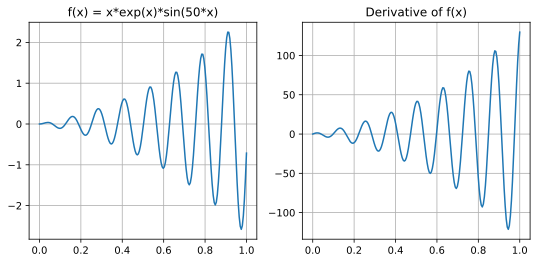

In [51]:
ffun = lambdify(x,f)
gfun = lambdify(x,g)
xx = np.linspace(0.0,1.0,200)
plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(xx,ffun(xx))
plt.grid(True)
plt.title('f(x) = '+str(f))
plt.subplot(122)
plt.plot(xx,gfun(xx))
plt.grid(True)
plt.title('Derivative of f(x)');